In [1]:
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
#Load CSV
data_to_graph_csv = Path("Resources/movie_trailer_data.csv")

#Read CSV
movie_trailer_data = pd.read_csv(data_to_graph_csv)
movie_trailer_data.head()


,Rank,Video Name,Worldwide,Domestic,Outside US,viewcount
0,1,Barbie,1441820453,636220453,805600000,79922625
1,2,The Super Mario Bros. Movie,1361367353,574934330,786433023,30401495
2,3,Oppenheimer,952021870,326087870,625934000,113097125
3,5,Fast X,704875015,146126015,558749000,85735892
4,6,Spider-Man: Across the Spider-Verse,690516673,381311319,309205354,87438940


/Users/candice/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 21.0)

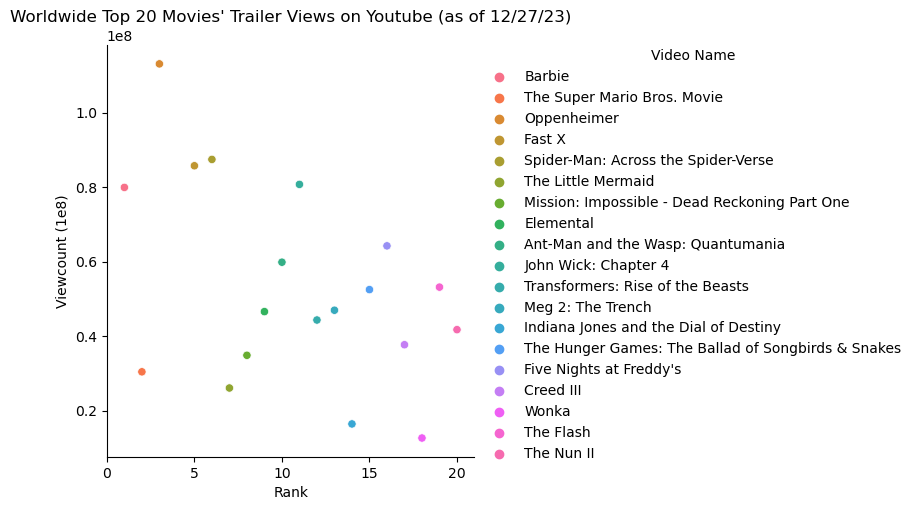

In [78]:
# Rank vs. viewcount
g1 = sns.relplot(data = movie_trailer_data, x= 'Rank', y='viewcount', hue='Video Name')
g1.set(title= "Worldwide Top 20 Movies' Trailer Views on Youtube (as of 12/27/23)", xlabel='Rank',ylabel='Viewcount (1e8)')
plt.xlim(0,21)


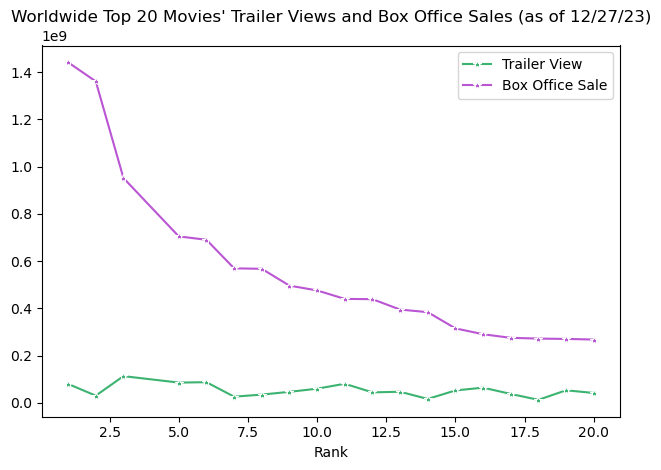

In [79]:
# ax2 = plt.twinx()
g2 = sns.lineplot(data = movie_trailer_data, x= 'Rank', y='viewcount',label="Trailer View",marker='*',color='mediumseagreen')
g3 = sns.lineplot(data = movie_trailer_data, x= 'Rank', y='Worldwide',label="Box Office Sale",marker='*',color='mediumorchid')
g2.set(ylabel=None)
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Worldwide Top 20 Movies' Trailer Views and Box Office Sales (as of 12/27/23)")
plt.tight_layout()

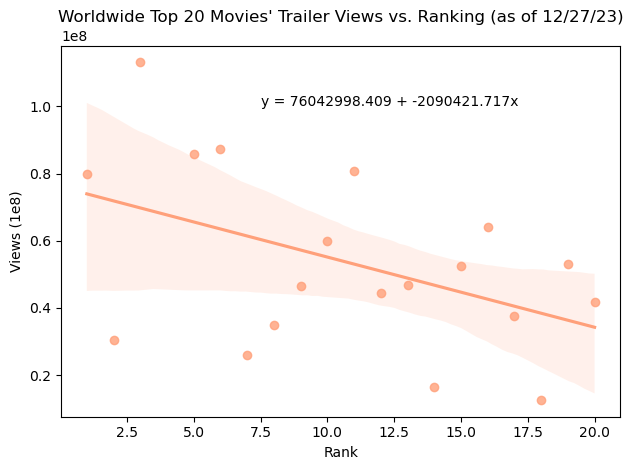

In [82]:
g4 = sns.regplot(data = movie_trailer_data, x= 'Rank', y='viewcount',color='lightsalmon')
slope, intercept, r, p, sterr = scipy.stats.linregress(x=g4.get_lines()[0].get_xdata(),
                                                       y=g4.get_lines()[0].get_ydata())
g4.set(title= "Worldwide Top 20 Movies' Trailer Views vs. Ranking (as of 12/27/23)", 
       xlabel='Rank',ylabel='Views (1e8)')
plt.text(7.5, 100000000, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
plt.tight_layout()

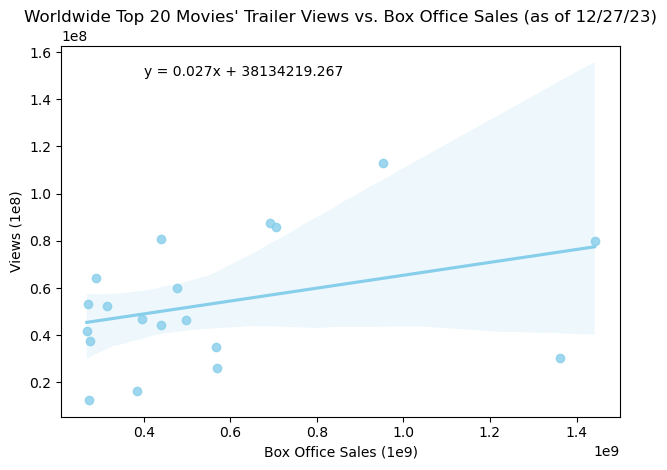

In [81]:
g5 = sns.regplot(data = movie_trailer_data, x= 'Worldwide', y='viewcount',color='skyblue')
slope, intercept, r, p, sterr = scipy.stats.linregress(x=g5.get_lines()[0].get_xdata(),
                                                       y=g5.get_lines()[0].get_ydata())
g5.set(title= "Worldwide Top 20 Movies' Trailer Views vs. Box Office Sales (as of 12/27/23)", 
       xlabel='Box Office Sales (1e9)',ylabel='Views (1e8)')
plt.text(400000000, 150000000, 'y = ' + str(round(slope,3)) + 'x' + ' + ' +str(round(intercept,3)))
plt.tight_layout()

In [23]:
# sns.relplot(data = movie_trailer_data, x= 'Rank', y='viewcount', kind="scatter", hue='Video Name')
# ax2 = plt.twinx()
# sns.lineplot(data = movie_trailer_data, x= 'Rank', y='Worldwide')
# plt.xlim(0,20)
# plt.legend(bbox_to_anchor=(1.35, 1), loc='upper left', borderaxespad=0., ncol=1)